<a href="https://colab.research.google.com/github/MUbarak123-56/fast-ai/blob/master/chapter1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -Uqq fastbook

In [2]:
from fastbook import *
from fastai.vision.widgets import *

In [3]:
from fastai.vision.all import *
path = untar_data(URLs.PETS)/'images'

def is_cat(x): return x[0].isupper()
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))

learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

/usr/local/lib/python3.8/dist-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pt

  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,0.183553,0.024089,0.008796,31:44


epoch,train_loss,valid_loss,error_rate,time
0,0.069763,0.021690,0.005413,47:22


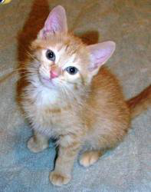

In [18]:
img = PILImage.create(image_cat())
img.to_thumb(192)

In [5]:
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

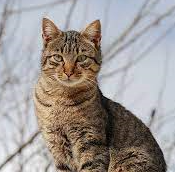

In [25]:
img = PILImage.create(uploader.data[0])
img

In [26]:
import torch

In [27]:
import torchvision.transforms as transforms
transform = transforms.Compose([
    transforms.PILToTensor()
])

In [28]:
import numpy as np

In [29]:
#img = PILImage.create(uploader.data[0])
is_cat, _, probs = learn.predict(np.asarray(img))
print(f"Is this a cat?: {is_cat}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")

Is this a cat?: True.
Probability it's a cat: 1.000000
